# Vehicle Silhouettes Classification using MLP

**Dataset**: Statlog (Vehicle Silhouettes) from UCI Machine Learning Repository

**Objective**: Train a Multi-Layer Perceptron (MLP) neural network to classify vehicle silhouettes into 4 categories: Bus, Opel, Saab, and Van.

---


## 1. Import Required Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import urllib.request
import warnings
warnings.filterwarnings('ignore')

# Random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")


Libraries imported successfully!
NumPy version: 2.3.2
Pandas version: 2.3.1
Scikit-learn version: 1.7.1


## 2. Load the Dataset


In [ ]:
def load_vehicle_data():
    """Load the Statlog Vehicle Silhouettes dataset from UCI"""
    print("Loading Statlog Vehicle Silhouettes dataset...")
    
    # URLs for all parts of the dataset
    urls = [
        "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xaa.dat",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xab.dat",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xac.dat",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xad.dat",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xae.dat",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xaf.dat",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xag.dat",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xah.dat",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xai.dat"
    ]
    
    all_data = []
    for i, url in enumerate(urls):
        try:
            print(f"Downloading part {i+1}/9...")
            response = urllib.request.urlopen(url)
            data = response.read().decode('utf-8')
            lines = data.strip().split('\n')
            
            for line in lines:
                if line.strip():
                    parts = line.strip().split()
                    if len(parts) >= 19:  # 18 features + 1 label
                        all_data.append(parts)
        except Exception as e:
            print(f"Error downloading part {i+1}: {e}")
            continue
    
    print(f"Total samples loaded: {len(all_data)}")
    
    # Convert to DataFrame
    columns = [f'feature_{i}' for i in range(18)] + ['class']
    df = pd.DataFrame(all_data, columns=columns)
    
    # Convert features to numeric
    for col in columns[:-1]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Remove rows with NaN values
    df = df.dropna()
    
    print(f"Dataset shape after cleaning: {df.shape}")
    print(f"Class distribution:")
    print(df['class'].value_counts())
    
    return df

# Load dataset
df = load_vehicle_data()


Loading Statlog Vehicle Silhouettes dataset...
Total samples loaded: 846
Dataset shape after cleaning: (846, 19)
Class distribution:
class
bus     218
saab    217
opel    212
van     199
Name: count, dtype: int64


## 3. Data Exploration and Visualization


In [ ]:
# Basic info
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Features: {df.shape[1]-1}")
print(f"Classes: {df['class'].nunique()}")
print(f"\nClass distribution:")
print(df['class'].value_counts())
print(f"\nClass percentages:")
print(df['class'].value_counts(normalize=True) * 100)


Dataset Info:
Shape: (846, 19)
Features: 18
Classes: 4

Class distribution:
class
bus     218
saab    217
opel    212
van     199
Name: count, dtype: int64

Class percentages:
class
bus     25.768322
saab    25.650118
opel    25.059102
van     23.522459
Name: proportion, dtype: float64


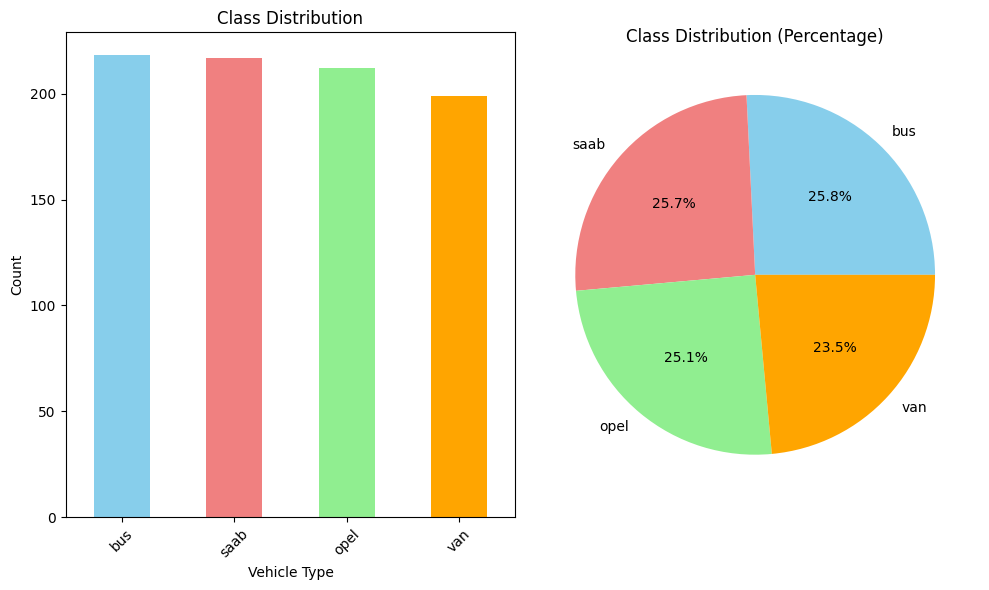

In [ ]:
# Class Distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['class'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Class Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
# Basic Statistics
print("Dataset Statistics:")
print(df.describe())


Dataset Statistics:
        feature_0   feature_1   feature_2   feature_3   feature_4   feature_5  \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean    93.678487   44.861702   82.088652  168.940898   61.693853    8.567376   
std      8.234474    6.169866   15.771533   33.472183    7.888251    4.601217   
min     73.000000   33.000000   40.000000  104.000000   47.000000    2.000000   
25%     87.000000   40.000000   70.000000  141.000000   57.000000    7.000000   
50%     93.000000   44.000000   80.000000  167.000000   61.000000    8.000000   
75%    100.000000   49.000000   98.000000  195.000000   65.000000   10.000000   
max    119.000000   59.000000  112.000000  333.000000  138.000000   55.000000   

        feature_6   feature_7   feature_8   feature_9  feature_10  \
count  846.000000  846.000000  846.000000  846.000000  846.000000   
mean   168.839243   40.933806   20.582742  147.998818  188.625296   
std     33.244978    7.811560    2.592138  

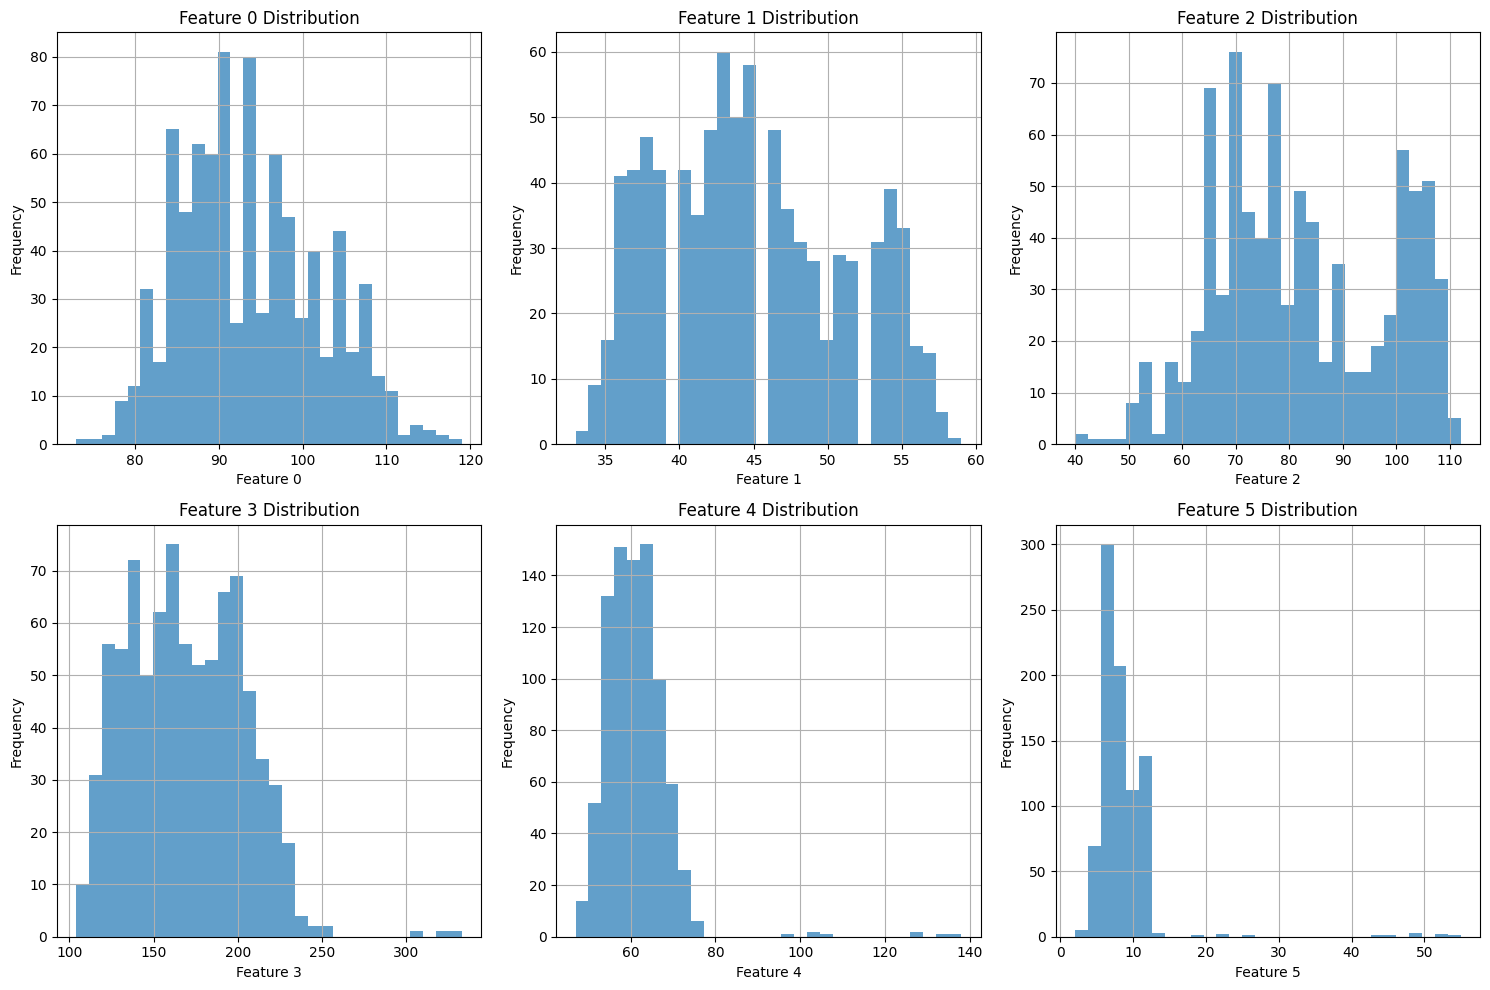

In [ ]:
# Visualize feature distributions
plt.figure(figsize=(15, 10))
for i in range(6): 
    plt.subplot(2, 3, i+1)
    df[f'feature_{i}'].hist(bins=30, alpha=0.7)
    plt.title(f'Feature {i} Distribution')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 4. Data Preprocessing


In [ ]:
def preprocess_data(df):
    """Preprocess the dataset"""
    print("Preprocessing data...")
    
    # Features and Labels
    X = df.iloc[:, :-1].values  # All columns except the last one
    y = df.iloc[:, -1].values   # Last column (class labels)
    
    # Encode labels to numeric values
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    print(f"Original classes: {le.classes_}")
    print(f"Encoded classes: {np.unique(y_encoded)}")
    
    # Data Splitting
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    
    # Further data splitting
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )
    
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Training set shape: {X_train_scaled.shape}")
    print(f"Validation set shape: {X_val_scaled.shape}")
    print(f"Test set shape: {X_test_scaled.shape}")
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, le, scaler

# Data Preprocessing
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder, scaler = preprocess_data(df)


Preprocessing data...
Original classes: ['bus' 'opel' 'saab' 'van']
Encoded classes: [0 1 2 3]
Training set shape: (540, 18)
Validation set shape: (136, 18)
Test set shape: (170, 18)


## 5. Build and Train MLP Model


In [ ]:
def build_mlp_model():
    """Build the MLP model"""
    print("Building MLP model...")
    
    # MLPClassifier Configuration
    mlp = MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),  # 3 hidden layers
        activation='relu',
        solver='adam',
        alpha=0.001,  # L2 regularization
        batch_size=32,
        learning_rate='adaptive',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=10
    )
    
    print("Model parameters:")
    print(f"Hidden layers: {mlp.hidden_layer_sizes}")
    print(f"Activation: {mlp.activation}")
    print(f"Solver: {mlp.solver}")
    print(f"Max iterations: {mlp.max_iter}")
    print(f"Early stopping: {mlp.early_stopping}")
    
    return mlp

# Model Building
mlp = build_mlp_model()


Building MLP model...
Model parameters:
Hidden layers: (128, 64, 32)
Activation: relu
Solver: adam
Max iterations: 1000
Early stopping: True


In [ ]:
def train_model(mlp, X_train, y_train, X_val, y_val):
    """Train the MLP model"""
    print("Training model...")
    
    # Training
    mlp.fit(X_train, y_train)
    
    # Model Scores
    train_score = mlp.score(X_train, y_train)
    val_score = mlp.score(X_val, y_val)
    
    print(f"Training completed!")
    print(f"Training accuracy: {train_score:.4f}")
    print(f"Validation accuracy: {val_score:.4f}")
    print(f"Number of iterations: {mlp.n_iter_}")
    
    return train_score, val_score

# Model Training
train_score, val_score = train_model(mlp, X_train, y_train, X_val, y_val)


Training model...
Training completed!
Training accuracy: 0.9130
Validation accuracy: 0.7574
Number of iterations: 36


## 6. Model Evaluation


In [ ]:
def evaluate_model(mlp, X_test, y_test, label_encoder):
    """Evaluate the model"""
    print("Evaluating model...")
    
    # Predictions
    y_pred = mlp.predict(X_test)
    y_pred_proba = mlp.predict_proba(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Per-class accuracy
    print("\nPer-class Accuracy:")
    for i, class_name in enumerate(label_encoder.classes_):
        class_mask = y_test == i
        if np.sum(class_mask) > 0:
            class_accuracy = accuracy_score(y_test[class_mask], y_pred[class_mask])
            print(f"{class_name}: {class_accuracy:.4f}")
    
    return y_pred, y_pred_proba, accuracy, cm

# Model Evaluation
y_pred, y_pred_proba, test_accuracy, cm = evaluate_model(mlp, X_test, y_test, label_encoder)


Evaluating model...
Test Accuracy: 0.7882

Classification Report:
              precision    recall  f1-score   support

         bus       1.00      1.00      1.00        44
        opel       0.57      0.60      0.58        42
        saab       0.63      0.59      0.61        44
         van       0.95      0.97      0.96        40

    accuracy                           0.79       170
   macro avg       0.79      0.79      0.79       170
weighted avg       0.79      0.79      0.79       170


Confusion Matrix:
[[44  0  0  0]
 [ 0 25 15  2]
 [ 0 18 26  0]
 [ 0  1  0 39]]

Per-class Accuracy:
bus: 1.0000
opel: 0.5952
saab: 0.5909
van: 0.9750


## 7. Visualization of Results


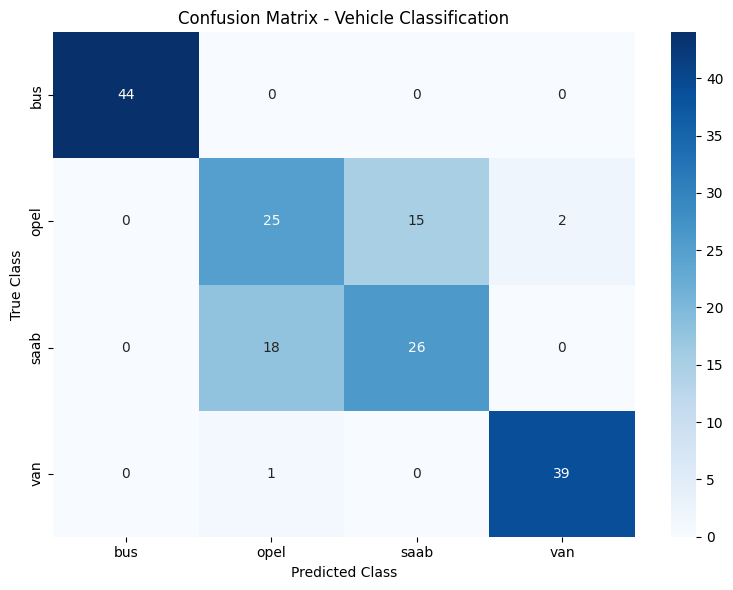

In [13]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=label_encoder.classes_,
           yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Vehicle Classification')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()


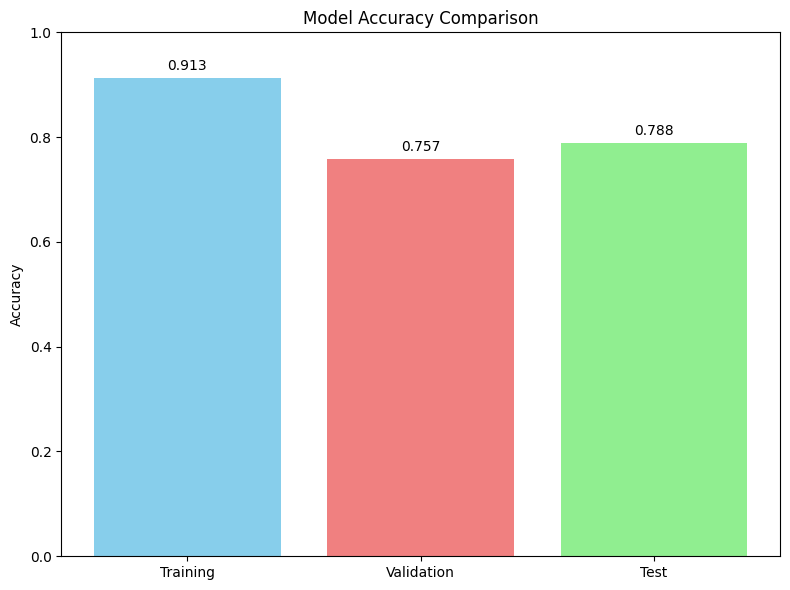

In [ ]:
# Plot accuracy comparison
categories = ['Training', 'Validation', 'Test']
accuracies = [train_score, val_score, test_accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
